# **Feature Extraction Evaluation**

# Importing Libraries

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import pandas as pd
import numpy as np
import boto3
from io import StringIO, BytesIO
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import tensorflow_hub as hub
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from statistics import mean, stdev
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/ec2-user/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Matplotlib is building the font cache; this may take a moment.


# Loading Clusters

In [ ]:
# loading sentence-cluster file from bucket
# declaring bucket and dataset
bucket = 'intelligent-social-media-tracking'
data_key = 'sentence_clustering_google_large_v3_rev_9.csv'
data_location = 's3://{}/data/processed_stopword_revolut/{}'.format(bucket, data_key)

# loading dataset
sent_cluster_df = pd.read_csv(data_location).iloc[:, 1:]
sent_cluster_df

text  \
0      Very good in basic stuff like currency exchang...   
1      Very good in basic stuff like currency exchang...   
2      Very good in basic stuff like currency exchang...   
3      Stay away from these scammers. I tried to make...   
4      Stay away from these scammers. I tried to make...   
...                                                  ...   
56941  STILL AFTER 1 YEAR CUSTOMER SUPPORT AND LIVE C...   
56942  STILL AFTER 1 YEAR CUSTOMER SUPPORT AND LIVE C...   
56943  The business idea is super cool but the timing...   
56944  The business idea is super cool but the timing...   
56945  The business idea is super cool but the timing...   

                                               sentences  \
0      Very good in basic stuff like currency exchang...   
1      Unfortunately very bad experience with profess...   
2      Customer support is good just for giving infor...   
3                         Stay away from these scammers.   
4      I tried to make a transfer from my US bank acc...   
...                                                  ...   
56941  \r,\r,REVOLUT MADE TWO HUGE  MISTAKES IN THINK...   
56942  \r,\r,DISGUSTING WAY TO TREAT DECENT AND LOYAL...   
56943  The business idea is super cool but the timing...   
56944  I have been waiting a month for the card and i...   
56945  If you are planning to use it soon for a trip ...   

                                       cleaned_sentences  \
0      very good basic stuff like currency exchange t...   
1      unfortunately very bad experience professional...   
2      customer support good just giving information ...   
3                             stay away these scammers .   
4                          tried transfer account $500 .   
...                                                  ...   
56941  made two huge mistakes thinking customers not ...   
56942      disgusting way treat decent loyal customers .   
56943  business idea super cool timing completely wro...   
56944                    waiting month not arrived yet .   
56945           planning soon trip please another option   

       n_neighbors_15_min_dist_0.0_min_cluster_100  \
0                                               82   
1                                              137   
2                                              109   
3                                               -1   
4                                              101   
...                                            ...   
56941                                           -1   
56942                                           36   
56943                                           -1   
56944                                           91   
56945                                           70   

       n_neighbors_15_min_dist_0.0_min_cluster_100_prob  \
0                                              0.004273   
1                                              0.006922   
2                                              0.006453   
3                                              0.000000   
4                                              0.007110   
...                                                 ...   
56941                                          0.000000   
56942                                          0.006563   
56943                                          0.000000   
56944                                          0.016108   
56945                                          0.057052   

       n_neighbors_15_min_dist_0.0_min_cluster_200  \
0                                               34   
1                                               51   
2                                               46   
3                                               -1   
4                                               41   
...                                            ...   
56941                                           11   
56942                                           13   
56943                                        

# Loading Relative Validity Scores

In [ ]:
# loading sentence-cluster file from bucket
# declaring bucket and dataset
bucket = 'intelligent-social-media-tracking'
data_key = 'relative_validity_google_large_v3_rev_all.csv'
data_location = 's3://{}/data/processed_stopword_revolut/{}'.format(bucket, data_key)

# loading dataset
relative_validity_df = pd.read_csv(data_location).iloc[:, 1:]
relative_validity_df

Evaluation Metric  n_neighbors_15_min_dist_0.0_min_cluster_100  \
0  Relative Validity (DBCV)                                     0.196255   

   n_neighbors_15_min_dist_0.0_min_cluster_200  \
0                                     0.138471   

   n_neighbors_15_min_dist_0.0_min_cluster_300  \
0                                     0.130345   

   n_neighbors_15_min_dist_0.5_min_cluster_100  \
0                                     0.070734   

   n_neighbors_15_min_dist_0.5_min_cluster_200  \
0                                     0.067036   

   n_neighbors_15_min_dist_0.5_min_cluster_300  \
0                                     0.067036   

   n_neighbors_15_min_dist_0.99_min_cluster_100  \
0                                       0.18367   

   n_neighbors_15_min_dist_0.99_min_cluster_200  \
0                                      0.011774   

   n_neighbors_15_min_dist_0.99_min_cluster_300  ...  \
0                                      0.007862  ...   

   n_neighbors_50_min_dist_0.99_min_cluster_300  \
0                                      0.000106   

   n_neighbors_100_min_dist_0.0_min_cluster_100  \
0                                      0.288527   

   n_neighbors_100_min_dist_0.0_min_cluster_200  \
0                                      0.217062   

   n_neighbors_100_min_dist_0.0_min_cluster_300  \
0                                      0.208775   

   n_neighbors_100_min_dist_0.5_min_cluster_100  \
0                                      0.461789   

   n_neighbors_100_min_dist_0.5_min_cluster_200  \
0                                      0.215471   

   n_neighbors_100_min_dist_0.5_min_cluster_300  \
0                                      0.215471   

   n_neighbors_100_min_dist_0.99_min_cluster_100  \
0                                       0.005294   

   n_neighbors_100_min_dist_0.99_min_cluster_200  \
0                                       0.000293   

   n_neighbors_100_min_dist_0.99_min_cluster_300  
0                                       0.000793  

[1 rows x 28 columns]

/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/py8_nlp/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



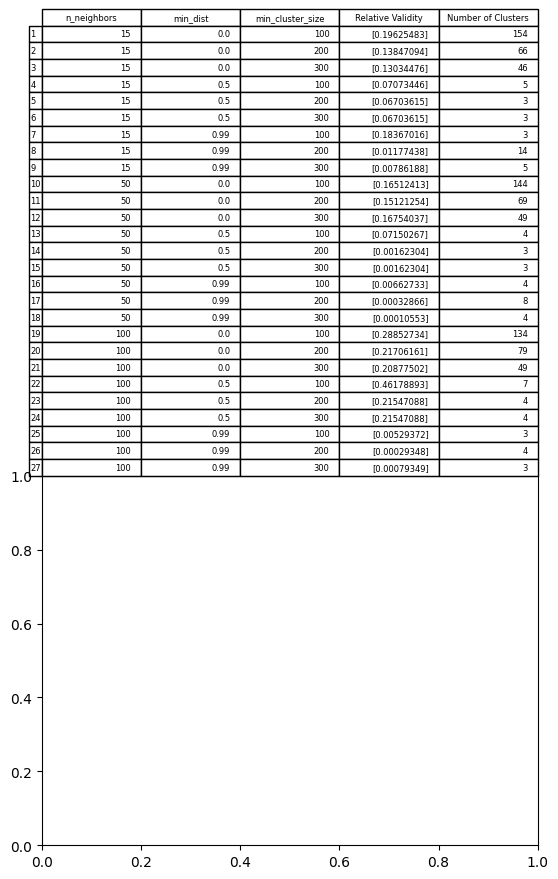

In [ ]:
n_neighbours_list = [15, 50, 100]
min_dist_list = [0.0, 0.5, 0.99]
min_cluster_size_list = [100, 200, 300]

cell_values = []
for n in n_neighbours_list:
    for dist in min_dist_list:
        for cluster in min_cluster_size_list:
            
            cell = []
            combi = f"n_neighbors_{n}_min_dist_{dist}_min_cluster_{cluster}"
            num_clusters = len(list(set(sent_cluster_df[combi].values)))
            dbcv = relative_validity_df[combi].values
            
            cell.append(n)
            cell.append(dist)
            cell.append(cluster)
            cell.append(dbcv)
            cell.append(num_clusters)
            
            cell_values.append(cell)

columns = ["n_neighbors", "min_dist", "min_cluster_size", "Relative Validity", "Number of Clusters"]
rows = [i + 1 for i in range(27)]

plt.table(cellText=cell_values, rowLabels=rows, colLabels=columns, loc="top")
plt.show()

# Plotting Embeddings and Distribution of Clusters

In [ ]:
bucket = 'intelligent-social-media-tracking'
num_top_topics = 30

# declaring hyperparameter combinations to iterate over
# n_neighbours_list = [15, 50, 100]
# min_dist_list = [0.0, 0.5, 0.99]
# min_cluster_size_list = [100, 200, 300]

n_neighbours_list = [100]
min_dist_list = [0.0]
min_cluster_size_list = [300]

len_n_neighbours = len(n_neighbours_list)
len_min_dist = len(min_dist_list)
len_min_cluster = len(min_cluster_size_list)

num_topics=15

for i in range(len_n_neighbours):
    for j in range(len_min_dist):
        for k in range(len_min_cluster):
            
            # declaring hyperparameter
            n_neighbors = n_neighbours_list[i]
            min_dist = min_dist_list[j]
            min_cluster_size = min_cluster_size_list[k]
            col_name = "n_neighbors_{0}_min_dist_{1}_min_cluster_{2}".format(n_neighbors, min_dist, min_cluster_size)
            hyperparam_combi = col_name
            
            # loading file from bucket
            # declaring bucket and dataset
            bucket = 'intelligent-social-media-tracking'
            data_key = "{0}_embeddings_cluster_topic_v3_rev.csv".format(hyperparam_combi)
            data_location = 's3://{}/data/embeddings_stopword_cluster_topic_v3_revolut/{}'.format(bucket, data_key)

            # loading dataset
            topic_cluster_df = pd.read_csv(data_location).iloc[:, 1:] # with noise
            topic_cluster_df["text"] = sent_cluster_df.loc[:, "text"]
            topic_cluster_df["sentences"] = sent_cluster_df.loc[:, "sentences"]
            topic_cluster_df["cleaned_sentences"] = sent_cluster_df.loc[:, "cleaned_sentences"]
            
            for l in range(len(topic_cluster_df)):
                if pd.isnull(topic_cluster_df.loc[l, "unigram_topics_nmf"]):
                    topic_cluster_df.loc[l, "unigram_topics_nmf"] = ""
                if pd.isnull(topic_cluster_df.loc[l, "unigram_topics_lda"]):
                    topic_cluster_df.loc[l, "unigram_topics_lda"] = ""
                if pd.isnull(topic_cluster_df.loc[l, "bigram_topics_nmf"]):
                    topic_cluster_df.loc[l, "bigram_topics_nmf"] = ""
                if pd.isnull(topic_cluster_df.loc[l, "bigram_topics_lda"]):
                    topic_cluster_df.loc[l, "bigram_topics_lda"] = ""
            
            # without noise
            topic_cluster_nn_df = topic_cluster_df[topic_cluster_df.loc[:, "cluster"] != -1]
            topic_cluster_nn_df.reset_index(drop=True, inplace=True)
            
            # getting clusters labels, sizes and corresponding topics
            clusters_nn = topic_cluster_nn_df.loc[:, "cluster"]
            unique_clusters_nn = np.unique(clusters_nn)
            cluster_size_nn = [(cluster, len(topic_cluster_nn_df[topic_cluster_nn_df.loc[:, "cluster"] == (cluster)])) 
                               for cluster in unique_clusters_nn]
            sorted_cluster_size_nn = sorted(cluster_size_nn, key=lambda x:x[1])
            
            # getting hover text, x and y labels (freq and topics respectively) for top 20 topics
            bar_text = [cluster_size[0] for cluster_size in sorted_cluster_size_nn][-num_top_topics:]
            x_bar_label = [cluster_size[1] for cluster_size in sorted_cluster_size_nn][-num_top_topics:]
            y_bar_label_uni_nmf = [" ".join(list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster, "unigram_topics_nmf"]))) 
                                   for cluster in bar_text][-num_top_topics:]
            y_bar_label_uni_lda = [" ".join(list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster, "unigram_topics_lda"]))) 
                                   for cluster in bar_text][-num_top_topics:]
            y_bar_label_bi_nmf = [" ".join(list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster, "bigram_topics_nmf"]))) 
                                  for cluster in bar_text][-num_top_topics:]
            y_bar_label_bi_lda = [" ".join(list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster, "bigram_topics_lda"]))) 
                                  for cluster in bar_text][-num_top_topics:]
            
            
            # declaring embeddings for 3d scatter plot
            embedding_umap_3d_large_df = topic_cluster_df.iloc[:, [0, 1, 2]]
            embedding_umap_3d_large_nn_df = topic_cluster_nn_df.iloc[:, [0, 1, 2]]
            
            # plotting 3d scatter plot and bar chart
            fig = make_subplots(
                rows=3, cols=1,
                subplot_titles=("Visualization of Clustered Embeddings (Without Noise)", 
                                f"Distribution of Top {num_topics} Clusters (Without Noise) - Bigram NMF",
                                f"Distribution of Top {num_topics} Clusters (Without Noise) - Bigram LDA"),
                specs=[[{'type': 'scatter3d'}], [{'type': 'bar'}], [{'type': 'bar'}]],
                vertical_spacing=0.05, horizontal_spacing=0.2)


            fig.add_trace(go.Scatter3d(
                x=embedding_umap_3d_large_nn_df.iloc[:, 0],
                y=embedding_umap_3d_large_nn_df.iloc[:, 1],
                z=embedding_umap_3d_large_nn_df.iloc[:, 2],
                hovertemplate='<b>%{text}</b><extra></extra>',
                text=["cluster {0}".format(cluster) for cluster in clusters_nn],
                mode='markers',
                marker=dict(
                    size=5,
                    color=clusters_nn,                # set color to an array/list of desired values
                    colorscale='hsv',   # choose a colorscale
                    opacity=0.1)), row=1, col=1)
            
            fig.add_trace(go.Bar(
                x=x_bar_label,
                y=y_bar_label_bi_nmf,
                hovertemplate='<b>%{text}</b><extra></extra>',
                text=["cluster {0}".format(cluster) for cluster in bar_text],
                marker=dict(color="green"),
                orientation='h'), row=2, col=1)

            fig.add_trace(go.Bar(
                x=x_bar_label,
                y=y_bar_label_bi_lda,
                hovertemplate='<b>%{text}</b><extra></extra>',
                text=["cluster {0}".format(cluster) for cluster in bar_text],
                marker=dict(color="green"),
                orientation='h'), row=3, col=1)

            fig.update_layout(height=2000, 
                              width=2000,
                              title_text="{0},\n\nNumber of Clusters = {1},\n\nRelative Validity = {2}".format(hyperparam_combi, len(cluster_size_nn),
                                                                                                         round(relative_validity_df.loc[0, hyperparam_combi], 3)),
                              font=dict(size=16),
                              showlegend=False,
                              margin=dict(l=10, r=0, b=0))

            fig.show()


# Evaluating Clusters to Merge

In [ ]:
table_df = pd.DataFrame(cluster_info, columns=["Cluster Number", "Cluster Size", "NMF Topic", "LDA Topic"])
table_df

Cluster Number  Cluster Size  \
0               -1         22718   
1                0           465   
2                1           647   
3                2           302   
4                3           309   
5                4           632   
6                5           900   
7                6           461   
8                7           310   
9                8           709   
10               9           778   
11              10           320   
12              11           798   
13              12           648   
14              13           440   
15              14           307   
16              15           430   
17              16           316   
18              17           416   
19              18           418   
20              19           814   
21              20           672   
22              21           812   
23              22           304   
24              23           345   
25              24          1045   
26              25           482   
27              26           887   
28              27           734   
29              28           568   
30              29           883   
31              30           491   
32              31           339   
33              32           711   
34              33           743   
35              34          2483   
36              35          3739   
37              36          1209   
38              37           657   
39              38           517   
40              39           988   
41              40           334   
42              41          1071   
43              42           574   
44              43           690   
45              44           545   
46              45          1150   
47              46           372   
48              47           463   

                                            NMF Topic  \
0                                                       
1   give stars, could give, one star, give one, st...   
2   crypto currency, amount crypto, buy crypto, no...   
3   trading platform, full year, buy sell, cannot ...   
4   hidden fees, awful company, charge back, raise...   
5   stay away, away company, not recommend, recomm...   
6   using app, started using, app ever, worst app,...   
7   live agent, touch live, looking agent, still l...   
8   not used, used since, used great, excellent se...   
9   great service, service great, poor service, ve...   
10  good reviews, reviews here, bad reviews, good ...   
11  account blocked, blocked since, blocked accoun...   
12  metal plan, plan customer, premium account, mo...   
13  terms conditions, read terms, does not, not wo...   
14  not refund, refund back, not refunded, too lat...   
15  app chat, replying app, customer service, serv...   
16  got scammed, just got, opening account, withou...   
17  bad experience, very bad, worst experience, ex...   
18  very disappointed, very very, not happy, reall...   
19  phone number, there phone, way contact, there ...   
20  business account, open business, open account,...   
21  pay bills, cannot pay, pay rent, cannot pay, v...   
22  still waiting, other words, still not, not res...   
23  goes wrong, something goes, great until, until...   
24  more than, than month, next day, day same, two...   
25  not work, does not, top up, wanted top, never ...   
26  sent documents, documents requested, more docu...   
27  absolute joke, joke company, very bad, very ve...   
28  good enough, not good, does not, not exist, co...   
29  speak human, human being, automated response, ...   
30  express delivery, free express, still not, not...   
31  live chat, chat not, via chat, chat team, onli...   
32  business elsewhere, take business, bad busines...   
33  phone number, changed phone, verify identity, ...   
34  customer service, service response, app chat, ...   
35  copy paste, paste reply, reply below, update r...   
36  customer service, worst customer, customer sup...   
37  transaction not, not through, cou

In [ ]:
clusters = topic_cluster_df.loc[:, "cluster"]
unique_clusters = np.unique(clusters)
cluster_numbers = [cluster_num for cluster_num in unique_clusters]
cluster_sizes = [len(topic_cluster_df[topic_cluster_df.loc[:, "cluster"] == (cluster)]) for cluster in cluster_numbers]
# cluster_sizes

topic_uni_nmf = [" ".join(list(set(topic_cluster_df.loc[topic_cluster_df.loc[:, "cluster"] == cluster, "unigram_topics_nmf"]))) for cluster in cluster_numbers]
topic_uni_lda = [" ".join(list(set(topic_cluster_df.loc[topic_cluster_df.loc[:, "cluster"] == cluster, "unigram_topics_lda"]))) for cluster in cluster_numbers]
topic_bi_nmf = [" ".join(list(set(topic_cluster_df.loc[topic_cluster_df.loc[:, "cluster"] == cluster, "bigram_topics_nmf"]))) for cluster in cluster_numbers]
topic_bi_lda = [" ".join(list(set(topic_cluster_df.loc[topic_cluster_df.loc[:, "cluster"] == cluster, "bigram_topics_lda"]))) for cluster in cluster_numbers]
cluster_info = [(cluster_numbers[i], cluster_sizes[i], topic_bi_nmf[i], topic_bi_lda[i]) for i in range(len(cluster_numbers))]
cluster_info

[(-1, 22718, '', ''),
 (0,
  465,
  'give stars, could give, one star, give one, stars because, only stars',
  'star review, gave stars, stars because, star because, one star, give stars'),
 (1,
  647,
  'crypto currency, amount crypto, buy crypto, not buy, does not, find out',
  'cryptocurrency exchange, premium account, buy crypto, cannot send, crypto currency, cannot transfer'),
 (2,
  302,
  'trading platform, full year, buy sell, cannot buy, stock trading, gme amc',
  'buy stocks, very very, trading account, asset value, trading platform, buy sell'),
 (3,
  309,
  'hidden fees, awful company, charge back, raised charge, does not, cannot charge',
  'without consent, cannot charge, charge fee, high fees, hidden fees, not charge'),
 (4,
  632,
  'stay away, away company, not recommend, recommend anyone, avoid costs, please avoid',
  'stay clear, avoid company, not recommend, recommend anyone, stay away, avoid costs'),
 (5,
  900,
  'using app, started using, app ever, worst app, app 

# Getting Context of Clusters

In [ ]:
module_url_large = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
model_large = hub.load(module_url_large)
print ("module %s loaded" % module_url_large)

def embed_large(input):
    return model_large(input)

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


Total Number of Clusters: 48
Enter cluster number: 6
Enter number of sentences to be viewed: 10

Cluster Number: 6
Cluster Size: 461    

Top 10 Most Relevant Sentences from Cluster (Original/Cleaned): 
0 I spent two days with your agents, trying to have some feedback.
0 spent two days agents trying some feedback .
0 0.765999821863088
1 Got a message on app chat, was asked a couple of security questions, waited over an hour, got reply that agent was finishing shift and somebody else would take over.
1 got message app chat asked couple security questions waited over hour got reply agent finishing shift somebody else take over .
1 0.7549369249592571
2 Your agent was nice but he could not provide any information about my card.
2 agent nice could not provide any information about .
2 0.7203909348541931
3 ,They just follow all the protocols given to them and repeat the same sentences over and over again without actually checking up exactly what’s going on.,Stay far and clear from this so ca

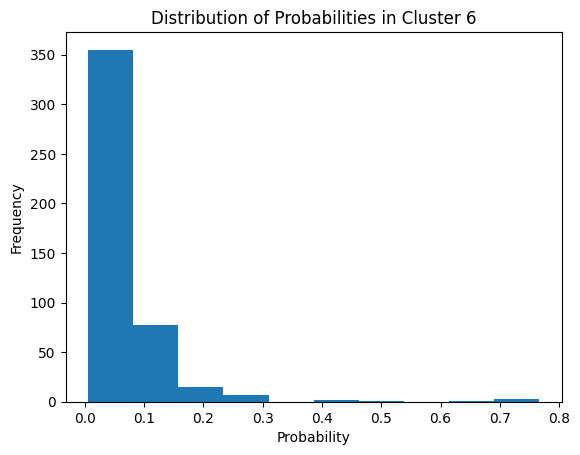

In [ ]:
# creating a function to get context of clusters

clusters_nn = topic_cluster_nn_df.loc[:, "cluster"]
bar_text = [cluster_size[0] for cluster_size in cluster_size_nn]
x_bar_label = [cluster_size[1] for cluster_size in cluster_size_nn]
y_bar_label_uni_nmf = [" ".join(list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster, "unigram_topics_nmf"]))) 
                       for cluster in bar_text]
y_bar_label_uni_lda = [" ".join(list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster, "unigram_topics_lda"]))) 
                       for cluster in bar_text]
y_bar_label_bi_nmf = [" ".join(list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster, "bigram_topics_nmf"]))) 
                      for cluster in bar_text]
y_bar_label_bi_lda = [" ".join(list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster, "bigram_topics_lda"]))) 
                      for cluster in bar_text]

def print_cluster_details(cluster_number, num_sent):
    """
    Takes the cluster number and number of sentences to print as input. 
    Outputs the: top 'num_sent' number of sentences in accordance to clustering probability, unigram, bigram topics, and distribution of clustering probabilities
    """
    
    # cluster size
    cluster_size = x_bar_label[cluster_number]
    
    cluster_df = topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:,"cluster"] == cluster_number, :]
    
    # top 10 sentences - originaland cleaned
    ori_sent_df = cluster_df.copy()
    ori_sent_df.reset_index(inplace=True, drop=True)  
    ori_sent = [(ori_sent_df.loc[i, "probability"], ori_sent_df.loc[i, "sentences"]) for i in range(len(ori_sent_df))]
    ori_sent_sorted = sorted(ori_sent, key=lambda x: x[0], reverse=True)
    
    cleaned_sent_df = cluster_df.copy()
    cleaned_sent_df.reset_index(inplace=True, drop=True)  
    cleaned_sent = [(cleaned_sent_df.loc[i, "probability"], cleaned_sent_df.loc[i, "cleaned_sentences"]) for i in range(len(cleaned_sent_df))]
    cleaned_sent_sorted = sorted(cleaned_sent, key=lambda x: x[0], reverse=True)
    
    ori_sent = [(i, sent) for (i, sent) in enumerate(ori_sent_sorted)]
    cleaned_sent = [(i, sent) for (i, sent) in enumerate(cleaned_sent_sorted)]
    ori_probs = [sent[0] for (i, sent) in enumerate(ori_sent_sorted)]
    
    top_ori_sent = ori_sent[:num_sent]
    top_cleaned_sent = cleaned_sent[:num_sent]
    top_probs = ori_probs[:num_sent]
    
    bottom_ori_sent = ori_sent[-num_sent:]
    bottom_cleaned_sent = cleaned_sent[-num_sent:]
    bottom_probs = ori_probs[-num_sent:]
    
    top_str = ""
    for i in range(len(top_ori_sent)):
        top_str += "\n{0} {1}\n{2} {3}\n{4} {5}".format(i, top_ori_sent[i][1][1], i, top_cleaned_sent[i][1][1], i, top_probs[i])
    
    bottom_str = ""
    for i in range(1, len(bottom_ori_sent) + 1):
        bottom_str += "\n{0} {1}\n{2} {3}\n{4} {5}".format(i - 1, bottom_ori_sent[-i][1][1], i - 1, bottom_cleaned_sent[-i][1][1], i, bottom_probs[-i])
    
    # distribution of probabilities
    prob_list = [prob for prob in cluster_df.loc[:, "probability"]]
    prob_mean = mean(prob_list)
    prob_std_dev = stdev(prob_list)
    
    # topics
    cluster_uni_nmf = y_bar_label_uni_nmf[cluster_number]
    cluster_uni_lda = y_bar_label_uni_lda[cluster_number]
    cluster_bi_nmf = y_bar_label_bi_nmf[cluster_number]
    cluster_bi_lda = y_bar_label_bi_lda[cluster_number]
    
    # word embeddings
    uni_nmf_embeddings = embed_large([cluster_uni_nmf.replace(",", "")])
    uni_lda_embeddings = embed_large([cluster_uni_lda.replace(",", "")])
    bi_nmf_embeddings = embed_large([cluster_bi_nmf.replace(",", "")])
    bi_lda_embeddings = embed_large([cluster_bi_lda.replace(",", "")])
    
    uni_similarity_embeddings = cosine_similarity(uni_lda_embeddings, uni_nmf_embeddings)[0][0]
    bi_similarity_embeddings = cosine_similarity(bi_lda_embeddings, bi_nmf_embeddings)[0][0]
    
    # BOW
    unigram_topics_nmf = list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster_number, "unigram_topics_nmf"]))
    unigram_topics_lda = list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster_number, "unigram_topics_lda"]))
    unigram_topics_nmf.extend(unigram_topics_lda) 
    bigram_topics_nmf = list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster_number, "bigram_topics_nmf"]))
    bigram_topics_lda = list(set(topic_cluster_nn_df.loc[topic_cluster_nn_df.loc[:, "cluster"] == cluster_number, "bigram_topics_lda"]))
    bigram_topics_nmf.extend(bigram_topics_lda)
    
    # lemmatising unigram and bigram for BOW
    wnl = WordNetLemmatizer()
    unigram_topics_nmf = [' '.join([wnl.lemmatize(word, tag[0].lower()) if tag[0].lower() in ['a', 'r', 'n', 'v'] else word 
                                    for word, tag in pos_tag(word_tokenize(unigram_topics_nmf[i]))]) for i in range(len(unigram_topics_nmf))]
    unigram_topics_nmf = [sent.replace(" , ", ", ") for sent in unigram_topics_nmf]
    
    wnl = WordNetLemmatizer()
    bigram_topics_nmf = [' '.join([wnl.lemmatize(word, tag[0].lower()) if tag[0].lower() in ['a', 'r', 'n', 'v'] else word 
                                   for word, tag in pos_tag(word_tokenize(bigram_topics_nmf[i]))]) for i in range(len(bigram_topics_nmf))]
    bigram_topics_nmf = [sent.replace(" , ", ", ") for sent in bigram_topics_nmf]
    
    tfVectorizer_uni = CountVectorizer(ngram_range=(1, 1))
    tf_uni = tfVectorizer_uni.fit_transform(unigram_topics_nmf) 
    tfVectorizer_bi = CountVectorizer(ngram_range=(1, 1))
    tf_bi = tfVectorizer_bi.fit_transform(bigram_topics_nmf)
    
    uni_similarity_bow = cosine_similarity(tf_uni.toarray()[0].reshape(1,-1), tf_uni.toarray()[1].reshape(1,-1))[0][0]
    bi_similarity_bow = cosine_similarity(tf_bi.toarray()[0].reshape(1,-1), tf_bi.toarray()[1].reshape(1,-1))[0][0]

    print("\nCluster Number: {0}\nCluster Size: {1}\
    \n\nTop {2} Most Relevant Sentences from Cluster (Original/Cleaned): {3}\
    \n\nTop {4} Least Relevant Sentences from Cluster (Original/Cleaned): {5}\
    \n\nUnigram (NMF) Topics: {6}\nUnigram (LDA) Topics: {7}\
    \nCosine Similarity Embeddings (Unigram): {8}\nCosine Similarity BOW (Unigram): {9}\
    \n\nBigram (NMF) Topics: {10}\nBigram (LDA) Topics: {11}\
    \nCosine Similarity Embeddings (Bigram): {12}\nCosine Similarity BOW (Bigram): {13}\
    \n\nMean Probability: {14}\nProbability Standard Deviation: {15}".format(cluster_number, 
                                                                                                cluster_size, 
                                                                                                num_sent,
                                                                                                top_str, 
                                                                                                num_sent, 
                                                                                                bottom_str, 
                                                                                                cluster_uni_nmf, 
                                                                                                cluster_uni_lda, 
                                                                                                uni_similarity_embeddings,
                                                                                                uni_similarity_bow, 
                                                                                                cluster_bi_nmf, 
                                                                                                cluster_bi_lda, 
                                                                                                bi_similarity_embeddings, 
                                                                                                bi_similarity_bow, prob_mean, prob_std_dev))
    
    plt.hist(prob_list, bins=10)
    plt.title("Distribution of Probabilities in Cluster {}".format(cluster_number))
    plt.xlabel("Probability")
    plt.ylabel("Frequency")
    plt.show()

print("Total Number of Clusters: {}".format(len(unique_clusters_nn)))
cluster_number = int(input("Enter cluster number: "))
num_sent = int(input("Enter number of sentences to be viewed: "))
print_cluster_details(cluster_number, num_sent)